In [1]:
import warnings
warnings.catch_warnings(record=True)

import sys
import pandas as pd
import numpy as np

from scipy.stats import pearsonr
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('html')

%matplotlib inline
path_prefix = "/project/jevans/jamshid/mag/"

import json


Bad key text.latex.preview in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig

# **CTRL F "*&" to find paths / variables to change**

load zero shot measurements

In [21]:
# bio_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/biology/MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
phys_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/physics/MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# ee_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/electrical_engineering//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# chem_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/chemistry//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# cs_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/computer_science//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# econ_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/economics//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# matsci_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/materials_science//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# math_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/math//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
# psych_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/psychology//MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)
soc_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/sociology/MAX_ZS_uncertainties_years.tsv', sep='\t', index_col=0)

load scibert measurements

In [2]:
# bio_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/biology/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
phys_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/physics/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
# ee_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/electrical_engineering/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
# chem_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/chemistry/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
# cs_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/computer_science/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
# econ_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/economics/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
# matsci_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/materials_science/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
# math_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/math/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
# psych_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/psychology/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)
soc_fin_wyear = pd.read_csv('/project/jevans/jamshid/mag/sociology/MAX_ScB_uncertainties_years.tsv', sep='\t', index_col=0)

# cultural background -- Journal Publisher

In [28]:
phys_uncertain_wloc = pd.read_csv('data_journalloc/phys_ScB_uncertain_wloc.csv') # *&
soc_uncertain_wloc = pd.read_csv('data_journalloc/soc_ScB_uncertain_wloc.csv') # *&

In [29]:
print("--phys")
print(phys_uncertain_wloc.location.value_counts())
print("--soc")
print(soc_uncertain_wloc.location.value_counts())

--phys
china      4929
america    3342
japan      1195
europe     1033
iran         75
britain      68
Name: location, dtype: int64
--soc
america    848
britain    568
europe     193
japan      181
china       49
Name: location, dtype: int64


In [30]:
phys_byLoc = phys_uncertain_wloc[['location','uncertain']].groupby('location').mean().reset_index()
phys_byLoc['uncertain'] = phys_byLoc['uncertain'] - phys_uncertain_wloc.uncertain.mean()
soc_byLoc = soc_uncertain_wloc[['location','uncertain']].groupby('location').mean().reset_index()
soc_byLoc['uncertain'] = soc_byLoc['uncertain'] - soc_uncertain_wloc.uncertain.mean()

In [31]:
compare_byLoc = pd.merge(phys_byLoc, soc_byLoc, how='inner',on='location').set_index('location')
compare_byLoc.columns = ['phys','soc']
compare_byLoc

,phys,soc
location,,
america,-0.002487,-0.003351
britain,-0.005563,0.009232
china,0.006601,-0.011202
europe,0.001879,-0.014989
japan,-0.021339,0.005743


<AxesSubplot: xlabel='location'>

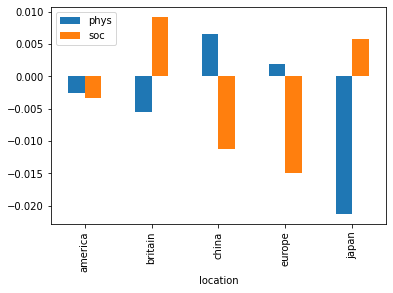

In [32]:
compare_byLoc.plot(kind='bar')

In [33]:
west_dict = {'america':True,'europe':True,'britain':True,'japan':False,'china':False,'iran':False}

In [34]:
phys_uncertain_wloc['west'] = phys_uncertain_wloc['location'].map(west_dict)
soc_uncertain_wloc['west'] = soc_uncertain_wloc['location'].map(west_dict)

In [35]:
roll = 3

phys_byYear = phys_uncertain_wloc[['west','uncertain','year']].groupby(['west','year']).mean().reset_index()
phys_byYear['uncertain'] = phys_byYear['uncertain'] - phys_byYear.uncertain.mean()
phys_byYear['rollingUncertain'] = phys_byYear['uncertain'].rolling(window=roll).mean()
phys_byYear['topic'] = ['phys']*len(phys_byYear)

soc_byYear = soc_uncertain_wloc[['west','uncertain','year']].groupby(['west','year']).mean().reset_index()
soc_byYear['uncertain'] = soc_byYear['uncertain'] - soc_byYear.uncertain.mean()
soc_byYear['rollingUncertain'] = soc_byYear['uncertain'].rolling(window=roll).mean()
soc_byYear['topic'] = ['soc']*len(soc_byYear)

In [36]:
compare_byYear = pd.concat([phys_byYear, soc_byYear])
compare_byYear = compare_byYear.query('year > 1960')

In [37]:
# compare_byYear = compare_byYear.query('topic == "soc"')

In [38]:
compare_byYear.query('topic=="soc"')#.query('west==True')

,west,year,uncertain,rollingUncertain,topic
7,False,1964.0,0.030660,-0.014006,soc
8,False,1966.0,0.052103,0.006481,soc
9,False,1967.0,0.035450,0.039404,soc
10,False,1968.0,-0.046695,0.013619,soc
11,False,1969.0,-0.012928,-0.008058,soc
...,...,...,...,...,...
158,True,2017.0,-0.014153,-0.021088,soc
159,True,2018.0,0.030191,-0.000533,soc
160,True,2019.0,-0.012085,0.001318,soc
161,True,2020.0,-0.035172,-0.005689,soc


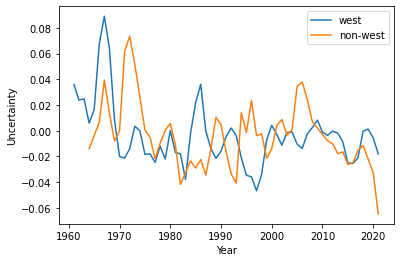

In [39]:
plt.plot(compare_byYear.query('topic=="soc"').query('west==True')['year'],
         compare_byYear.query('topic=="soc"').query('west==True')['rollingUncertain'],
        label = 'west')
plt.plot(compare_byYear.query('topic=="soc"').query('west==False')['year'],
         compare_byYear.query('topic=="soc"').query('west==False')['rollingUncertain'],
        label = 'non-west')
plt.xlabel('Year')
plt.ylabel('Uncertainty')
plt.legend()

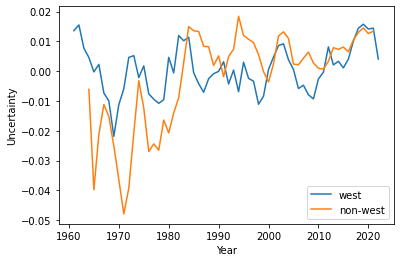

In [40]:
plt.plot(compare_byYear.query('topic=="phys"').query('west==True')['year'],
         compare_byYear.query('topic=="phys"').query('west==True')['rollingUncertain'],
        label = 'west')
plt.plot(compare_byYear.query('topic=="phys"').query('west==False')['year'],
         compare_byYear.query('topic=="phys"').query('west==False')['rollingUncertain'],
        label = 'non-west')
plt.xlabel('Year')
plt.ylabel('Uncertainty')
plt.legend()

In [41]:
alt.Chart(compare_byYear.query('topic=="soc"')).mark_line(point=alt.OverlayMarkDef()).encode(
    alt.X('year',scale=alt.Scale(zero=False),axis=alt.Axis(title='Year')),
    alt.Y('rollingUncertain',axis=alt.Axis(title='Uncertainty')),
    color=alt.Color('west:O',scale=alt.Scale(scheme='set2'))
).properties(width=600,height=300)

alt.Chart(...)

In [42]:
alt.Chart(compare_byYear.query('topic=="phys"')).mark_line(point=alt.OverlayMarkDef()).encode(
    alt.X('year',scale=alt.Scale(zero=False),axis=alt.Axis(title='Year')),
    alt.Y('rollingUncertain',axis=alt.Axis(title='Uncertainty')),
    color=alt.Color('west:O',scale=alt.Scale(scheme='set2'))
).properties(width=600,height=300)

alt.Chart(...)

# Rank

In [46]:
bio_wrank = pd.read_csv('/scratch/midway3/graceshaoy2/data_rank/bio_ScB_wrank.csv') # *&
phys_wrank = pd.read_csv('/scratch/midway3/graceshaoy2/data_rank/phys_ScB_wrank.csv') # *&
ee_wrank = pd.read_csv('/scratch/midway3/graceshaoy2/data_rank/ee_ScB_wrank.csv') # *&

In [47]:
print("bio")
print(str(bio_wrank['seriesrank'].isnull().values.sum() / len(bio_wrank)) + " series null")
print(str(bio_wrank['journalrank'].isnull().values.sum() / len(bio_wrank)) + " journal null")
print("phys")
print(str(phys_wrank['seriesrank'].isnull().values.sum() / len(phys_wrank)) + " series null")
print(str(phys_wrank['journalrank'].isnull().values.sum() / len(phys_wrank)) + " journal null")
print("ee")
print(str(ee_wrank['seriesrank'].isnull().values.sum() / len(ee_wrank)) + " series null")
print(str(ee_wrank['journalrank'].isnull().values.sum() / len(ee_wrank)) + " journal null")

bio
0.9994995309520596 series null
0.9905820618371933 journal null
phys
0.9995717026850766 series null
0.9914452471664332 journal null
ee
0.9995283032462535 series null
0.991535396950591 journal null


In [48]:
bio_wrank['seriesrank'].isnull().values.sum(), len(bio_wrank)

(4405659, 4407865)

In [49]:
bio_wseries = bio_wrank[~bio_wrank['seriesrank'].isnull()]
bio_wjournal = bio_wrank[~bio_wrank['journalrank'].isnull()]
phys_wseries = phys_wrank[~phys_wrank['seriesrank'].isnull()]
phys_wjournal = phys_wrank[~phys_wrank['journalrank'].isnull()]
ee_wseries = ee_wrank[~ee_wrank['seriesrank'].isnull()]
ee_wjournal = ee_wrank[~ee_wrank['journalrank'].isnull()]

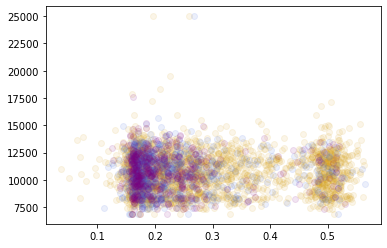

In [50]:
plt.scatter(bio_wseries.uncertain, bio_wseries.seriesrank, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys_wseries.uncertain, phys_wseries.seriesrank, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee_wseries.uncertain, ee_wseries.seriesrank, c = "purple", label = "EE", alpha = 0.1)

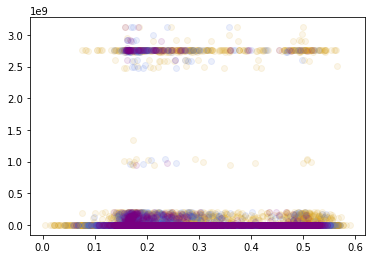

In [51]:
plt.scatter(bio_wjournal.uncertain, bio_wjournal.journalrank, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys_wjournal.uncertain, phys_wjournal.journalrank, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee_wjournal.uncertain, ee_wjournal.journalrank, c = "purple", label = "EE", alpha = 0.1)

In [9]:
for cutoff in np.arange(1950,2020,10):
    for df in [bio_wjournal, bio_wseries, phys_wjournal, phys_wseries, ee_wjournal, ee_wseries]:
        after_df = df.query('year >= @cutoff')
        #*!

In [8]:
# print("##### journal #####")
# df = bio_wjournal
# for cutoff in np.arange(1950, 2020, 10):
#     late_journal = df.query('year >= @cutoff')
#     print('cutoff =', cutoff)
#     print('len:', len(late_journal))
#     print('spearmanr:', "corr", spearmanr(df.uncertain, df.journalrank)[0:])
#     print('pearsonr:', "corr", pearsonr(df.uncertain, df.journalrank))
#     print('----')
# print("##### series #####")
# df = bio_wseries
# for cutoff in np.arange(1950, 2020, 10):
#     late_series = df.query('year >= @cutoff')
#     print('cutoff =', cutoff)
#     print('len:', len(late_series))
#     print('spearmanr:', "corr", spearmanr(df.uncertain, df.seriesrank)[0:])
#     print('pearsonr:', "corr", pearsonr(df.uncertain, df.seriesrank))
#     print('----')

# Citation Count

In [53]:
bio_wcitation = pd.read_csv("data_citation/bio_ScB_wcitation.csv").rename(columns = {"Unnamed: 0":"paperid"}) # *&
phys_wcitation = pd.read_csv("data_citation/phys_ScB_wcitation.csv").set_index("Unnamed: 0").rename(columns = {"Unnamed: 0":"paperid"}) # *&
ee_wcitation = pd.read_csv("data_citation/ee_ScB_wcitation.csv").set_index("Unnamed: 0").rename(columns = {"Unnamed: 0":"paperid"}) # *&

### for specific year

#### 2000

In [54]:
bio2000 = bio_wcitation.query('year==2000').query('citation_count > 10')
phys2000 = phys_wcitation.query('year==2000').query('citation_count > 10')
ee2000 = ee_wcitation.query('year==2000').query('citation_count > 10')

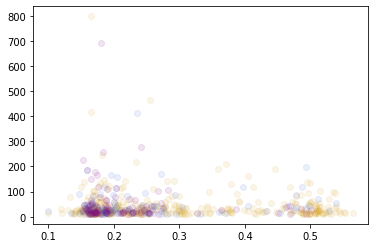

In [55]:
plt.scatter(bio2000.uncertain, bio2000.citation_count, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys2000.uncertain, phys2000.citation_count, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee2000.uncertain, ee2000.citation_count, c = "purple", label = "EE", alpha = 0.1)

In [56]:
bio2000 = bio2000.dropna()
spearmanr(bio2000.uncertain, bio2000.citation_count), pearsonr(bio2000.uncertain, bio2000.citation_count)

(SpearmanrResult(correlation=0.037746968189278654, pvalue=0.4691402318258596),
 (-0.02827596731698838, 0.587703362964446))

In [57]:
phys2000 = phys2000.dropna()
spearmanr(phys2000.uncertain, phys2000.citation_count), pearsonr(phys2000.uncertain, phys2000.citation_count)

(SpearmanrResult(correlation=0.08251622314456657, pvalue=0.39143719462886994),
 (0.11581242395650967, 0.2282672801233625))

In [58]:
ee2000 = ee2000.dropna()
spearmanr(ee2000.uncertain, ee2000.citation_count), pearsonr(ee2000.uncertain, ee2000.citation_count)

(SpearmanrResult(correlation=0.3140507784508279, pvalue=0.2960358276673091),
 (0.0247135270118269, 0.9361271244084345))

#### 2010

In [59]:
bio2010 = bio_wcitation.query('year==2010')#.query('citation_count > 10')
phys2010 = phys_wcitation.query('year==2010')#.query('citation_count > 10')
ee2010 = ee_wcitation.query('year==2010')#.query('citation_count > 20')

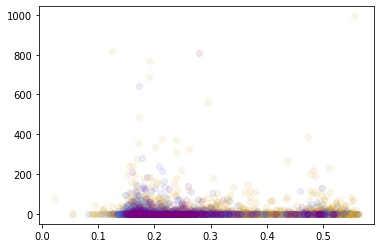

In [60]:
plt.scatter(bio2010.uncertain, bio2010.citation_count, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys2010.uncertain, phys2010.citation_count, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee2010.uncertain, ee2010.citation_count, c = "purple", label = "EE", alpha = 0.1)

In [61]:
bio2010 = bio2010.dropna()
spearmanr(bio2010.uncertain, bio2010.citation_count), pearsonr(bio2010.uncertain, bio2010.citation_count)

(SpearmanrResult(correlation=-0.02186071244004249, pvalue=0.1490962682059756),
 (-0.012547065990049868, 0.4076725640161628))

In [62]:
phys2010 = phys2010.dropna()
spearmanr(phys2010.uncertain, phys2010.citation_count), pearsonr(phys2010.uncertain, phys2010.citation_count)

(SpearmanrResult(correlation=-0.003776958740599491, pvalue=0.8799321056762586),
 (-0.016042803832648493, 0.5210983923345001))

In [63]:
ee2010 = ee2010.dropna()
spearmanr(ee2010.uncertain, ee2010.citation_count), pearsonr(ee2010.uncertain, ee2010.citation_count)

(SpearmanrResult(correlation=0.03186132578516572, pvalue=0.6608702268082518),
 (-0.05231347933470928, 0.47113286692316964))

### uncertainty vs. cc might not show anything bc cc more related to the year

In [66]:
bio2000

,paperid,uncertain,year,paperid,citation_count
228,108723610,0.502893,2000,2.132013e+09,64.0
655,109446069,0.307083,2000,1.989393e+09,11.0
905,109907284,0.168804,2000,2.086841e+09,85.0
1214,110429986,0.277362,2000,2.020349e+09,14.0
1477,110835943,0.195898,2000,2.971552e+09,14.0
...,...,...,...,...,...
3819411,235736119,0.194125,2000,2.114742e+09,37.0
3819524,236145235,0.485945,2000,2.334052e+09,17.0
3819791,237064887,0.158022,2000,2.187934e+09,31.0
3819811,237147468,0.471460,2000,1.505612e+09,58.0


In [64]:
plt.scatter(bio2000.uncertainty)

AttributeError: 'DataFrame' object has no attribute 'uncertainty'

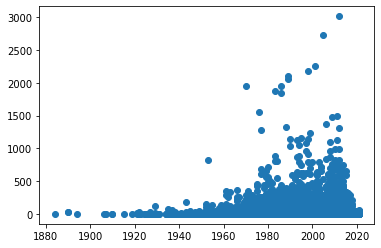

In [65]:
plt.scatter(bio_wcitation.year, bio_wcitation.citation_count)
# uncertainty vs. cc might not show anything bc cc more related to the year

In [240]:
bio_cc_dict = bio_wcitation[["year","citation_count"]].groupby("year").sum().to_dict()['citation_count']
phys_cc_dict = phys_wcitation[["year","citation_count"]].groupby("year").sum().to_dict()['citation_count']
ee_cc_dict = ee_wcitation[["year","citation_count"]].groupby("year").sum().to_dict()['citation_count']

# bio_cc_dict

In [36]:
def cc_prop(df, cc_dict):
    res = []
    for i in df.index:
        if cc_dict[df.year[i]] == 0:
            res.append(0)
        else:
            res.append(df.citation_count[i]/cc_dict[df.year[i]])
    return res

In [30]:
bio_wcitation.sort_values("prop_cc")

,paperid,uncertain,year,citation_count,prop_cc
4408079,3156839789,0.991331,2021,0.0,0.0
1604250,2955372003,0.084900,2019,0.0,0.0
1604255,2955372853,0.049155,2019,0.0,0.0
1604258,2955374072,0.943077,2019,0.0,0.0
1604259,2955374082,0.757684,2019,0.0,0.0
...,...,...,...,...,...
4406677,2981649924,0.245042,2020,NaN,NaN
4406688,2981652790,0.191188,2019,NaN,NaN
4406748,2981666593,0.790390,2019,NaN,NaN
4407992,3156789756,0.890433,2021,NaN,NaN


In [37]:
bio_wcitation["prop_cc"] = cc_prop(bio_wcitation, bio_cc_dict)
phys_wcitation["prop_cc"] = cc_prop(phys_wcitation, phys_cc_dict)
ee_wcitation["prop_cc"] = cc_prop(ee_wcitation, ee_cc_dict)

bio_wcitation.sort_values("prop_cc")

,paperid,uncertain,year,citation_count,prop_cc
4408079,3156839789,0.991331,2021,0.0,0.0
1604250,2955372003,0.084900,2019,0.0,0.0
1604255,2955372853,0.049155,2019,0.0,0.0
1604258,2955374072,0.943077,2019,0.0,0.0
1604259,2955374082,0.757684,2019,0.0,0.0
...,...,...,...,...,...
4406677,2981649924,0.245042,2020,NaN,NaN
4406688,2981652790,0.191188,2019,NaN,NaN
4406748,2981666593,0.790390,2019,NaN,NaN
4407992,3156789756,0.890433,2021,NaN,NaN


In [38]:
bio_wcitation.dropna().sort_values("prop_cc")

,paperid,uncertain,year,citation_count,prop_cc
4408079,3156839789,0.991331,2021,0.0,0.0
1604250,2955372003,0.084900,2019,0.0,0.0
1604255,2955372853,0.049155,2019,0.0,0.0
1604258,2955374072,0.943077,2019,0.0,0.0
1604259,2955374082,0.757684,2019,0.0,0.0
...,...,...,...,...,...
1181360,1988317992,0.975416,1840,11.0,1.0
3384912,2006420098,0.993821,1842,2.0,1.0
937323,2143990523,0.921640,1821,3.0,1.0
2601511,2467115401,0.984629,1872,1.0,1.0


### visualizing

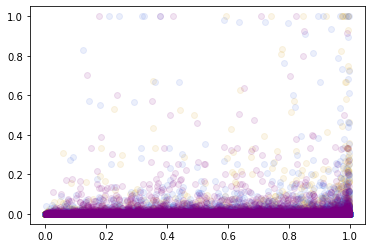

In [39]:
plt.scatter(bio_wcitation.uncertain, bio_wcitation.prop_cc, c = "goldenrod", label = "Biology", alpha = 0.1)
plt.scatter(phys_wcitation.uncertain, phys_wcitation.prop_cc, c = "royalblue", label = "Physics", alpha = 0.1)
plt.scatter(ee_wcitation.uncertain, ee_wcitation.prop_cc, c = "purple", label = "EE", alpha = 0.1)

In [31]:
bio_wcitation = bio_wcitation.dropna()

In [37]:
spearmanr(bio_wcitation.uncertain, bio_wcitation.prop_cc)

SpearmanrResult(correlation=0.0005240653080555313, pvalue=0.27182684836807386)

In [11]:
top_bio_cc = bio_wcitation.query("citation_count > 100")
top_phys_cc = phys_wcitation.query("citation_count > 100")
top_ee_cc = ee_wcitation.query("citation_count > 100")

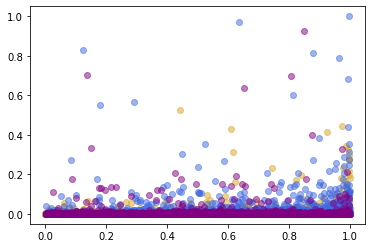

In [12]:
plt.scatter(top_bio_cc.uncertain, top_bio_cc.prop_cc, c = "goldenrod", label = "Biology", alpha = 0.5)
plt.scatter(top_phys_cc.uncertain, top_phys_cc.prop_cc, c = "royalblue", label = "Physics", alpha = 0.5)
plt.scatter(top_ee_cc.uncertain, top_ee_cc.prop_cc, c = "purple", label = "EE", alpha = 0.5)
# *! feel like citation counts aren't linear, hit a breakthrough point -- whether hit that or not related to uncertainty?

In [36]:
top_bio_cc = top_bio_cc.dropna()
spearmanr(top_bio_cc.uncertain, top_bio_cc.porp_cc)

SpearmanrResult(correlation=0.062219469284043864, pvalue=2.7830766374540446e-298)